# E-handel: Snabbrapport

<class 'pandas.core.frame.DataFrame'>


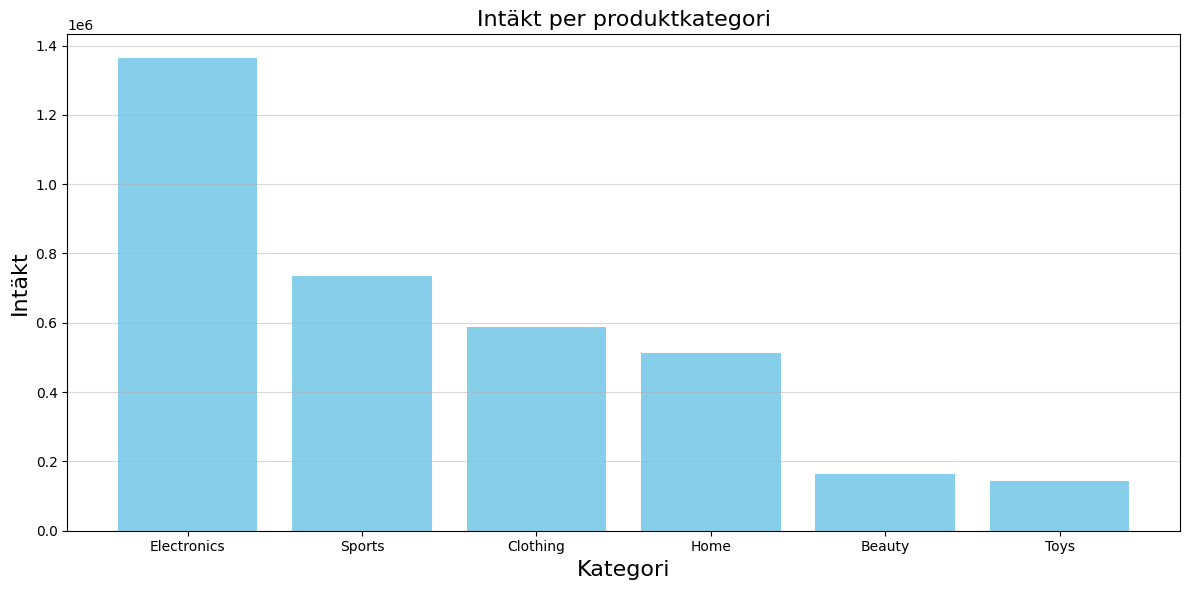

In [1]:

# Importerar Python-modulerna sys och os
# sys ger tillgång till systemrelaterade funktioner
# os används för att hantera filer och mappar på datorn

import sys, os
sys.path.append(os.path.abspath('..'))

import matplotlib.pyplot as mlp

from src.io_utils import load_sales
from src.metrics import revenue_by_category
df = load_sales("../data/ecommerce_sales.csv")

print(type(df))
df.head()
cat_rev = revenue_by_category(df)
cat_rev.head()


# stapeldiagram
mlp.figure(figsize=(12, 6)) 
mlp.bar(cat_rev["category"], cat_rev["revenue"], color='skyblue')

# lägger till rubriker
mlp.title("Intäkt per produktkategori", fontsize=16)
mlp.xlabel("Kategori", fontsize=16)
mlp.ylabel("Intäkt", fontsize=16)

# rutnät
mlp.grid(axis="y", linestyle="-", alpha=0.5)
mlp.tight_layout()
mlp.show()